### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook

### List of Directories

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Basic Models - Using Pipe Line - Removing Genres which has one records.ipynb',
 'Basic Models - Using Pipe Line .ipynb',
 'Basic Models.ipynb',
 'Markdown File.pdf',
 'movies_metadata.csv',
 'Visualization_Movies_Data.ipynb']

### Read the data

In [3]:
meta_data = pd.read_csv("movies_metadata.csv")

In [4]:
meta_data.shape
print("meta_data we have %s rows and %s Columns "%(meta_data.shape[0],meta_data.shape[1]))

meta_data we have 45466 rows and 24 Columns 


In [5]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [6]:
data = meta_data.loc[:, ['original_title','title','tagline','overview','genres']] 

In [7]:
data.head(5)

,original_title,title,tagline,overview,genres
0,Toy Story,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"


In [8]:
data.shape

(45466, 5)

In [9]:
data.isnull().sum()

original_title        0
title                 6
tagline           25054
overview            954
genres                0
dtype: int64

In [10]:
import ast
data['genres'] = data['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x,list) else [])

In [11]:
data.head()

,original_title,title,tagline,overview,genres
0,Toy Story,Toy Story,NaN,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,Jumanji,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,Waiting to Exhale,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,Father of the Bride Part II,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,[Comedy]


In [12]:
genres = data['genres']
unique_genres =sum(genres,[])
unique = len(set(unique_genres))

In [13]:
import nltk
genres_u = nltk.FreqDist(unique_genres)
all_genres_df = pd.DataFrame({'Genre': list(genres_u.keys()),'Count': list(genres_u.values())})
g = all_genres_df.nlargest(columns="Count",n=unique)

In [14]:
g = pd.DataFrame(g)

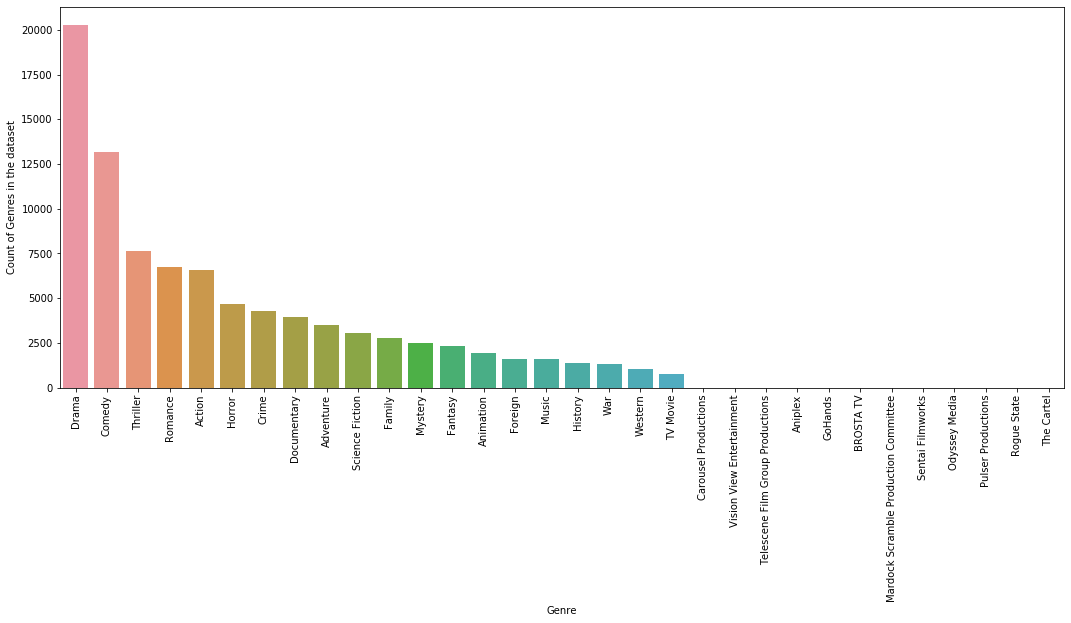

In [15]:
import seaborn as sns
x = ['Drama','Comedy','Thriller','Romance','Action','Horror','Crime','Documentary','Adventure','Science Fiction','Family','Mystery',
     'Fantasy','Animation','Foreign','Music','History','War','Western','TV Movie','Carousel Productions','Vision View Entertainment',
     'Telescene Film Group Productions','Aniplex','GoHands','BROSTA TV','Mardock Scramble Production Committee','Sentai Filmworks',
     'Odyssey Media','Pulser Productions','Rogue State','The Cartel']
plt.figure(figsize=(18,7))
ax=sns.barplot(x = "Genre",y = "Count",data = g)
ax.set(ylabel = 'Count of Genres in the dataset')
ax.set_xticklabels(labels = x ,rotation=90)
plt.show()

In [16]:
# e = final_data["Movie_name"].tolist()
# from textblob import TextBlob
# for i in tqdm_notebook(range(len(e))):
#     #print(e[i])
#     de_blob = TextBlob(e[i])
#     e[i] = de_blob.translate(to='en')
# Scratch - for converting the other languages to English Languages
# from textblob import TextBlob
# de_blob = TextBlob(u"Pasqualino Settebellezze")
# de_blob.detect_language()
# de_blob.translate(to='en')

In [17]:
data.dropna(subset = ['overview'],inplace=True,axis=0)

In [18]:
data['overview'].isnull().sum()

0

In [19]:
d = data["overview"].tolist()

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer 
from nltk.tokenize import word_tokenize
for i in tqdm_notebook(range(0,len(d))):
    d[i] = re.sub(r'[^\w]',r' ',d[i])
    d[i] = re.sub(r'[0-9]',r' ',d[i])
    d[i] = d[i].lower()
    d[i] = d[i].split()
    #porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    #lancaster = LancasterStemmer()
    d[i] = [lemmatizer.lemmatize(word) for word in d[i]]
    d[i] = " ".join(d[i])
    d[i] = word_tokenize(d[i])
    stop_words = stopwords.words('english')
    d[i] = [word for word in d[i] if word not in stop_words]
    d[i] = ' '.join(d[i])
data['clean_text'] = d

In [21]:
data['clean_text']

0        led woody andy toy live happily room andy birt...
1        sibling judy peter discover enchanted board ga...
2        family wedding reignites ancient feud next doo...
3        cheated mistreated stepped woman holding breat...
4        george bank ha recovered daughter wedding rece...
                               ...                        
45461                             rising falling man woman
45462    artist struggle finish work storyline cult pla...
45463    one hit go wrong professional assassin end sui...
45464    small town live two brother one minister one h...
45465    year decriminalisation homosexuality uk direct...
Name: clean_text, Length: 44512, dtype: object

In [22]:
final_data = data.loc[:, ['clean_text','genres']] 

In [23]:
final_data.head(3)

,clean_text,genres
0,led woody andy toy live happily room andy birt...,"[Animation, Comedy, Family]"
1,sibling judy peter discover enchanted board ga...,"[Adventure, Fantasy, Family]"
2,family wedding reignites ancient feud next doo...,"[Romance, Comedy]"


In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb= MultiLabelBinarizer()

In [25]:
final_data = final_data.join(pd.DataFrame(mlb.fit_transform(final_data['genres']),columns=mlb.classes_,index=final_data.index))

In [26]:
final_data.columns

Index(['clean_text', 'genres', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'],
      dtype='object')

In [27]:
final_data["target"] = final_data['Action']+final_data['Adventure']+final_data['Animation']+final_data['Aniplex']+final_data['BROSTA TV']+final_data['Carousel Productions']+final_data['Comedy']+final_data['Crime']+final_data['Documentary']+final_data['Drama']+final_data['Family']+final_data['Fantasy']+final_data['Foreign']+final_data['GoHands']+final_data['History']+final_data['Horror']+final_data['Mardock Scramble Production Committee']+final_data['Music']+final_data['Mystery']+final_data['Odyssey Media']+final_data['Pulser Productions']+final_data['Rogue State']+final_data['Romance']+final_data['Science Fiction']+final_data['Sentai Filmworks']+final_data['TV Movie']+final_data['Telescene Film Group Productions']+final_data['The Cartel']+final_data['Thriller']+final_data['Vision View Entertainment']+final_data['War']+final_data['Western']

In [28]:
final_data['target']

0        3
1        3
2        2
3        3
4        1
        ..
45461    2
45462    1
45463    3
45464    0
45465    0
Name: target, Length: 44512, dtype: int32

In [29]:
final_data.shape

(44512, 35)

In [30]:
final_data1 = final_data[final_data.target != 0]
final_data1.shape

(42327, 35)

In [31]:
final_data1.columns

Index(['clean_text', 'genres', 'Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western', 'target'],
      dtype='object')

In [32]:
final_data1.drop(['genres'],axis=1,inplace=True)

In [33]:
final_data1.reset_index(drop = True, inplace = True)

In [34]:
count = final_data1[['Action', 'Adventure', 'Animation', 'Aniplex',
       'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror',
       'Mardock Scramble Production Committee', 'Music', 'Mystery',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance',
       'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western']].sum(axis=0)
count = pd.DataFrame(count)
count.reset_index(level=0, inplace=True)
count.columns = ['Genre', 'Count']

In [35]:
count

,Genre,Count
0,Action,6565
1,Adventure,3470
2,Animation,1920
3,Aniplex,1
4,BROSTA TV,1
5,Carousel Productions,1
6,Comedy,12806
7,Crime,4269
8,Documentary,3886
9,Drama,20023


Text(0.5, 0, 'Genres')

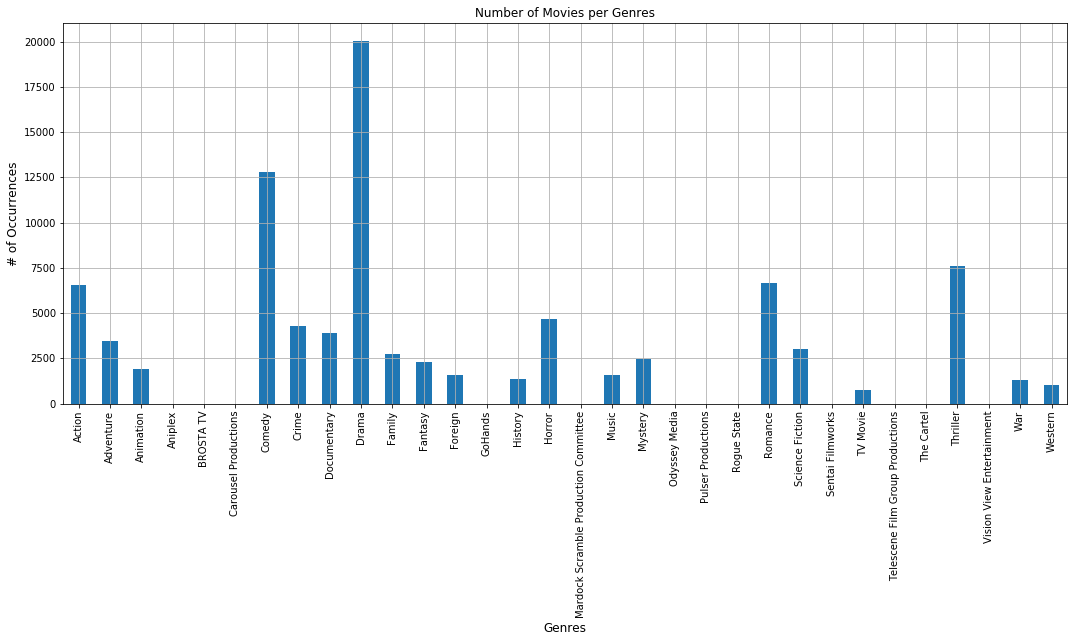

In [36]:
count.plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(18, 7))
plt.title("Number of Movies per Genres")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Genres', fontsize=12)

Text(0.5, 0, '# of Genres')

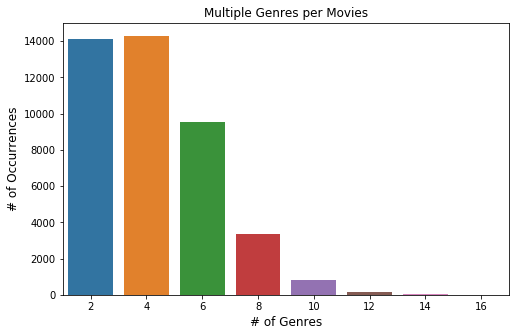

In [37]:
## How mnay movies have multi-labels(Genres)
rowsums = final_data1.iloc[:,1:].sum(axis=1)
x=rowsums.value_counts()

## Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple Genres per Movies")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of Genres', fontsize=12)

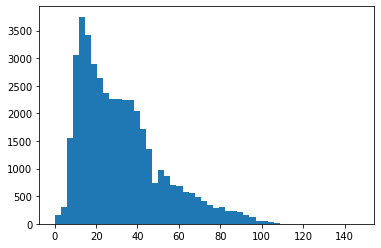

In [38]:
## Number of words in each sentence
sentence = final_data1["clean_text"].tolist()

plt.hist([len(s.split()) for s in sentence], bins = 50)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
genres = ['Drama','Comedy','Thriller','Romance','Action','Horror','Crime','Documentary','Adventure','Science Fiction','Family','Mystery',
     'Fantasy','Animation','Foreign','Music','History','War','Western','TV Movie','Carousel Productions','Vision View Entertainment',
     'Telescene Film Group Productions','Aniplex','GoHands','BROSTA TV','Mardock Scramble Production Committee','Sentai Filmworks',
     'Odyssey Media','Pulser Productions','Rogue State','The Cartel']
train, test = train_test_split(final_data1, random_state = 42, test_size = 0.2, shuffle = True)

In [40]:
X_train = train.clean_text
X_test = test.clean_text
y_train = train[genres].values
y_test = test[genres].values
print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (33861,)
Shape of X_test (8466,)
Shape of y_train (33861, 32)
Shape of y_test (8466, 32)


In [41]:
stop_words = set(stopwords.words('english'))

### Naive Bayes Pipeline Model

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsRestClassifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=1000,stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

predict_NB = pd.DataFrame()
for genre in genres:
    print('... Processing {}'.format(genre))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[genre])
    # compute the testing accuracy
    train_prediction = NB_pipeline.predict(X_train).tolist()
    prediction = NB_pipeline.predict(X_test).tolist()
    print('Train f1_score is {}'.format(f1_score(train[genre], train_prediction)))
    print('Test f1_score is {}'.format(f1_score(test[genre], prediction)))
    predict_NB[genre] = prediction

... Processing Drama
Train f1_score is 0.6679213446687
Test f1_score is 0.6668407992686431
... Processing Comedy
Train f1_score is 0.32413846995389545
Test f1_score is 0.30434782608695654
... Processing Thriller
Train f1_score is 0.14363342634748127
Test f1_score is 0.12876052948255115
... Processing Romance
Train f1_score is 0.07176175098672406
Test f1_score is 0.06506364922206506
... Processing Action
Train f1_score is 0.22711809492953186
Test f1_score is 0.21518151815181522
... Processing Horror
Train f1_score is 0.1471241668723772
Test f1_score is 0.13926499032882014
... Processing Crime
Train f1_score is 0.13368146214099216
Test f1_score is 0.10816777041942606
... Processing Documentary
Train f1_score is 0.456950456950457
Test f1_score is 0.4196342637151107
... Processing Adventure
Train f1_score is 0.02015838732901368
Test f1_score is 0.026525198938992044
... Processing Science Fiction
Train f1_score is 0.2438848920863309
Test f1_score is 0.21517241379310345
... Processing Family

In [43]:
predict_NB.head()

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,...,Telescene Film Group Productions,Aniplex,GoHands,BROSTA TV,Mardock Scramble Production Committee,Sentai Filmworks,Odyssey Media,Pulser Productions,Rogue State,The Cartel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
rowsums = predict_NB.iloc[:,:].sum(axis=1)
x=rowsums.value_counts()
x

1    4330
0    3688
2     398
3      44
4       4
5       2
dtype: int64

### Linear SVC

In [45]:
from sklearn.svm import LinearSVC
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=1000,stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

predict_SVC = pd.DataFrame()
for genre in genres:
    print('... Processing {}'.format(genre))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[genre])
    # compute the testing accuracy
    train_prediction = SVC_pipeline.predict(X_train).tolist()
    prediction = SVC_pipeline.predict(X_test).tolist()
    print('Train F1_Score is {}'.format(f1_score(train[genre],train_prediction)))
    print('Test F1_Score is {}'.format(f1_score(test[genre], prediction)))
    predict_SVC[genre] = prediction

... Processing Drama
Train F1_Score is 0.692509233245999
Test F1_Score is 0.6746527335287371
... Processing Comedy
Train F1_Score is 0.5381897916920454
Test F1_Score is 0.4920863309352518
... Processing Thriller
Train F1_Score is 0.38621813525782794
Test F1_Score is 0.3360459550023935
... Processing Romance
Train F1_Score is 0.3773739581910098
Test F1_Score is 0.34683954619124796
... Processing Action
Train F1_Score is 0.4443576727840687
Test F1_Score is 0.4124932687129779
... Processing Horror
Train F1_Score is 0.5234179478012155
Test F1_Score is 0.5013812154696132
... Processing Crime
Train F1_Score is 0.35368687935770127
Test F1_Score is 0.29038112522686027
... Processing Documentary
Train F1_Score is 0.7113129020052971
Test F1_Score is 0.6596385542168675
... Processing Adventure
Train F1_Score is 0.1477383664171819
Test F1_Score is 0.1542168674698795
... Processing Science Fiction
Train F1_Score is 0.4835420914651907
Test F1_Score is 0.461878453038674
... Processing Family
Train F1

In [48]:
predict_SVC

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,...,Telescene Film Group Productions,Aniplex,GoHands,BROSTA TV,Mardock Scramble Production Committee,Sentai Filmworks,Odyssey Media,Pulser Productions,Rogue State,The Cartel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8462,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8463,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=100,stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

predict_lr = pd.DataFrame()
for genre in genres:
    print('... Processing {}'.format(genre))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[genre])
    # compute the testing accuracy
    train_prediction = LogReg_pipeline.predict(X_train).tolist()
    prediction = LogReg_pipeline.predict(X_test).tolist()
    print('Train f1_score is {}'.format(f1_score(train[genre], train_prediction)))
    print('Test F1_Score is {}'.format(f1_score(test[genre], prediction)))
    predict_lr[genre] = prediction

... Processing Drama
Train f1_score is 0.59533724628652
Test F1_Score is 0.6000786472670074
... Processing Comedy
Train f1_score is 0.20677993397213948
Test F1_Score is 0.20112781954887218
... Processing Thriller
Train f1_score is 0.11242254352316317
Test F1_Score is 0.09712230215827337
... Processing Romance
Train f1_score is 0.2285019750835612
Test F1_Score is 0.20444978953698137
... Processing Action
Train f1_score is 0.08131791097090782
Test F1_Score is 0.05527272727272727
... Processing Horror
Train f1_score is 0.03814998693493599
Test F1_Score is 0.040774719673802244
... Processing Crime
Train f1_score is 0.10443864229765012
Test F1_Score is 0.11086956521739132
... Processing Documentary
Train f1_score is 0.46908919301557334
Test F1_Score is 0.4977457168620378
... Processing Adventure
Train f1_score is 0.0
Test F1_Score is 0.0
... Processing Science Fiction
Train f1_score is 0.0
Test F1_Score is 0.0
... Processing Family
Train f1_score is 0.0018407731247123793
Test F1_Score is 0.

In [47]:
predict_lr

,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,...,Telescene Film Group Productions,Aniplex,GoHands,BROSTA TV,Mardock Scramble Production Committee,Sentai Filmworks,Odyssey Media,Pulser Productions,Rogue State,The Cartel
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8462,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8463,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8464,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
